## System Setup

In [1]:
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}
# This is to overcome torch CUDA version issue. (It is not needed when using cpu only)
shell_call("wget https://storage.googleapis.com/torch-lantern-builds/packages/cu117/0.11.0/src/contrib/torch_0.11.0_R_x86_64-pc-linux-gnu.tar.gz")
install.packages("torch_0.11.0_R_x86_64-pc-linux-gnu.tar.gz", repos = NULL)
# For some reasons, the coro package (a torch dependency) is not installed from torch when using binaries
install.packages("coro")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
shell_call("R --version | head -n 1")

R version 4.3.1 (2023-06-16) -- "Beagle Scouts"

In [3]:
install.packages("BKTR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘Rcpp’, ‘collections’, ‘RgoogleMaps’, ‘png’, ‘plyr’, ‘jpeg’, ‘bitops’, ‘R6P’, ‘ggmap’




In [5]:
install.packages("ggpubr") # To place kernel plots side by side

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




## BKTR Kernels (Section 4)

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


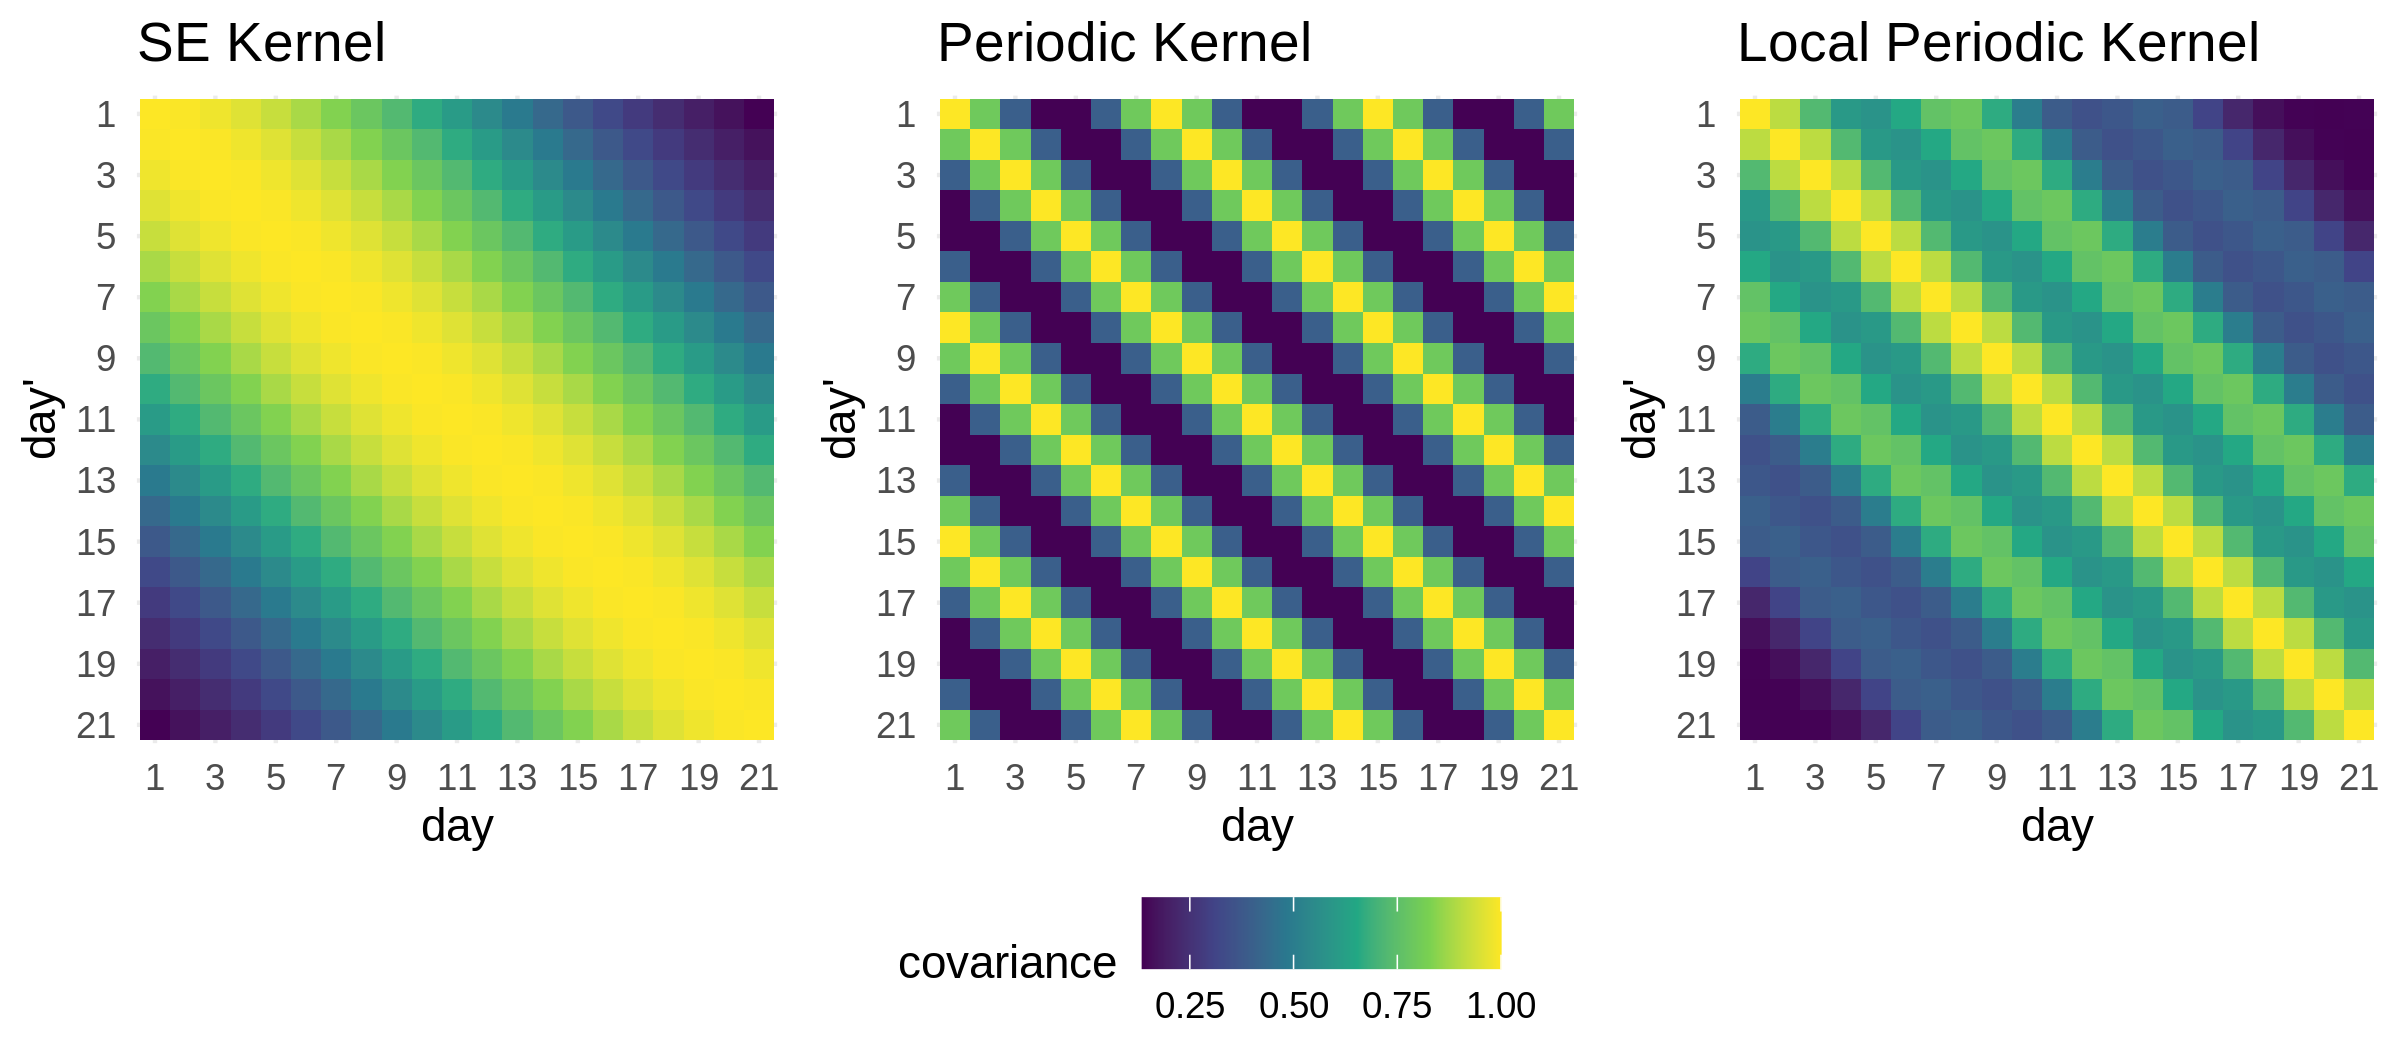

In [14]:
library(BKTR)
library(ggpubr) # To place kernel plots side by side (Figure 3)

MIN_DAY <- 1
MAX_DAY <- 21
pos_df <- data.frame(day=MIN_DAY:MAX_DAY, pos=as.numeric(MIN_DAY:MAX_DAY))

# Create three kernels: Periodic, SE and Local Periodic
se_lengthscale <- KernelParameter$new(value=10)
per_length <- KernelParameter$new(value=7, is_fixed=TRUE)
k_periodic <- KernelPeriodic$new(period_length=per_length)
k_se <- KernelSE$new(lengthscale=se_lengthscale)
k_local_periodic <- k_periodic * k_se
k_se$set_positions(pos_df)
k_periodic$set_positions(pos_df)
k_local_periodic$set_positions(pos_df)
# Set their covariance matrices
cov_per <- k_periodic$kernel_gen()
cov_se <- k_se$kernel_gen()
cov_lper <- k_local_periodic$kernel_gen()

# Create plot scales
sxd <- scale_x_discrete(
  limits=factor(MIN_DAY:MAX_DAY),
  breaks=as.character(seq(MIN_DAY, MAX_DAY, by=2))
)
syd <- scale_y_discrete(
  limits=factor(MAX_DAY:MIN_DAY),
  breaks=as.character(seq(MAX_DAY,MIN_DAY, by=-2))
)
sfv <- scale_fill_viridis_c()

# Plot each kernels
p1 <- k_se$plot(show_figure = FALSE) + sxd + syd + sfv
p2 <- k_periodic$plot(show_figure = FALSE) + sxd + syd + sfv
p3 <- k_local_periodic$plot(show_figure = FALSE) + sxd + syd + sfv

# Make one plot with all kernels (Figure 3)
options(repr.plot.width = 8, repr.plot.height = 3.5, repr.plot.res = 300)
ggarrange(p1, p2, p3 + ggtitle('Local Periodic Kernel'),
          common.legend = T, ncol=3, legend = 'bottom')
